Dataset URL: https://data.transportation.gov/Public-Transit/Transit-System-Time-Series/h3hh-wfqt/data

Background Information:

Important resources:

https://www.transit.dot.gov/sites/fta.dot.gov/files/2020-12/2019-NTST-1-1_0.pdf - 2019 report
https://www.reginfo.gov/public/do/DownloadDocument?objectID=66669801 - 2013 reporting guide

 

General formatting rules:

Round all financial data to the nearest dollar;
• Follow other rounding directions for each form;
• Unless otherwise indicated, report data as whole numbers; and
• Use four digits for year entries
4 digit NTD ID
According to a 2013 report: 
"Each reporter is assigned a unique four-digit NTD Identification Number, which is to be used in all NTD reports and correspondence. The first digit of the NTD ID corresponds to the FTA Region where the reporter is located (e.g., 9### indicates Region IX)."
Agency 
https://www.transit.dot.gov/ntd/transit-agency-profiles
Reporter Type

-Small Systems 

-Waiver Reporters

-Planning Grant Reporters

-Capital Grant Reporters

-Full Annual Reporters


Important column labels:

Primary UZA Code

--urbanuzed area

The U.S. Census Bureau defines UZAs based on incorporated places (e.g., cities, towns,
villages) and their adjacent areas. For more information, visit the U.S. Census website.
For the purpose of transit grants, FTA also designates the Virgin Islands and Lake Tahoe
as UZAs.

In the NTD, transit providers indicate the primary UZA of service operations as their
“primary UZA” along with any secondary UZAs they serve. For analysis purposes, the
NTST groups UZAs into the following categories:

• Small UZAs: population of 50,000 to 200,000.

• Medium UZAs: population of 200,000 to 1 million.

• Large UZAs: population over 1 million.

Of all Urban Reporters, approximately 35 percent agencies primarily serve a small UZA
(35 percent), 26 percent primarily serve a medium UZA, and 39 percent primarily serve a
large UZA.

Primary UZA Name

Year

Total Vehicle Operations Cost

Total Vehicle Maintenance Cost

Total Facility Maintenance Cost

Total General Administration Cost

Total Operating Expenses

Total ADA Cost

Total Capital Expenses

Total DO Mode Fares

Total PT Mode Fares

Total of Fares

Park and Ride Revenue (Earned Only)

Other Transportation Revenue (Earned Only)

Auxiliary Revenue-Concessions (Earned Only)

Auxiliary Revenue-Advertising (Earned Only)

Auxiliary Revenue-Other (Earned Only)

Total Auxiliary Revenue (Earned Only, N-P)

Non-Transportation Revenue (Earned Only)

Total Park & Ride, Other Trans., Auxiliary, & Non-Trans. Expenditures (K-S)

PT Agmt with NTD Reporter Revenue

PT Agmt with Non-NTD Reporter Revenue

Contributed Services

Subsidy from Other Sector Amount

Donations Amount (RR)

Contract Revenue Amount (RR)

Total Recoveries

State Transportation Funds

Income Taxes (Earned Only)

Sales Taxes (Earned Only)

Property Taxes (Earned Only)

Gasoline Taxes (Earned Only)

Other Taxes (Earned Only)

Bridge, Tunnel, and Highway Tolls (Earned Only)	

High Occupancy Tolls (Earned Only)	

Other Dedicated Funds (Earned Only)	

Total Vehicles/Passenger Cars Available for Maximum Service	

Total Actual Vehicle/Passenger Car Revenue Miles	

Total Actual Vehicle/Passenger Car Revenue Hours	

Total Train Revenue Miles	

Total Train Revenue Hours	

Total Unlinked Passenger Trips (UPT)	

Total ADA UPT	

Total Passenger Miles	

Total Mixed Traffic Right of Way (ROW) Directional Route Miles	

Total Directional Route Miles	

Total Hours Worked	

Total Employee Count	

Total Track Miles	

Total Crossings	

Total Bus Lane Miles	

Total Revenue Vehicle System Failures	

Total Assets	

Liabilities: Long Term Debt	

Total Liabilities	

Total Current Assets	

Total Noncurrent Assets	

Total Assets (1000)	

Total Current Liabilities	

Total Noncurrent Liabilities	

Total Liabilities (2000)	



Visualizations:
-Heatmap of a specific UZA and its revenue or other demographic related information

-Line plots of debt/assets/revenue (earned from taxes or other means) over time

-Can try to look at profit with given information (would need to look over 2019s analysis in order to calculate the formula)

-Maybe another trend analysis?

-Maybe ANOVA test or similar signficance test with revenue/debt and specific costs/earnings


In [107]:
# import dataset
import pandas as pd
import geopy
import geopy.geocoders
from geopy.extra.rate_limiter import RateLimiter

api_key = "" #Insert Google API key here
df = pd.read_csv('Transit_System_Time_Series.csv',low_memory = False)
df.tail()

,5 digit NTD ID,4 digit NTD ID,Agency,Reporter Type,Subrecipient Type,Organization Type,Agency Total Fleet Vehicles,Primary UZA Code,Primary UZA Name,Primary UZA Area SQ Miles,...,Long-Term Debt (2210),Noncurrent Accounts Payable (2220),Capital Lease Obligations (2230),Long-Term Pension Liabilities (2240),Estimated Liabilities (2250),Other Noncurrent Liabilities (2290),Total Noncurrent Liabilities,Total Liabilities (2000),Deferred Outflows Of Resources (3100),Net Position (3000)
16478,A0020-55643,NaN,"Marielders, Inc.",Reduced Asset Reporter,Asset Subrecipient,Private-Non-Profit Corporation,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16479,A0020-55646,NaN,Maple Knoll Communities,Reduced Asset Reporter,Asset Subrecipient,Private-Non-Profit Corporation,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16480,A0020-55647,NaN,Clermont County Board of Developmental Disabil...,Reduced Asset Reporter,Asset Subrecipient,Private-Non-Profit Corporation,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16481,A0021,NaN,City of Tucson,Group Plan Sponsor,NaN,"City, County or Local Government Unit or Depar...",0,52.0,"Tucson, AZ",353.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16482,A0022,NaN,San Luis Obispo Regional Transit Authority,Group Plan Sponsor,NaN,Independent Public Agency or Authority of Tran...,0,447.0,"San Luis Obispo, CA",20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#heatmap

#Clean data
df['Primary UZA Name'].value_counts()
citydf = df[['Primary UZA Name']].dropna()
citydf = citydf.drop_duplicates()
citydf.columns = ['Primary UZA Name']
print(citydf['Primary UZA Name'][46])

Washington Non-UZA


In [11]:
#Heatmap
#need to geocode the names: https://towardsdatascience.com/geocode-with-python-161ec1e62b89
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent = "myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
location = []
for city in citydf['Primary UZA Name']:
    l = locator.geocode(city)
    if(l != None):
        location.append(l)
locationdf = pd.DataFrame(location)
locationdf.columns = ['location','coordinates']
#locationdf = locationdf.apply(lambda loc: tuple(loc.point) if loc else None)
#locationdf['point'] = citydf['location'].apply(lambda loc: tuple(loc.point) if loc else None)
#citydf[['latitude', 'longitude', 'altitude']] = pd.DataFrame(citydf['point'].tolist(), index=citydf.index)
print('0')

0


In [109]:
import gmaps
import gmaps.datasets
#jupyter labextension install @jupyter-widgets/jupyterlab-manager
#jupyter lab build
#only works on jupyter notebook
gmaps.configure(api_key=api_key)
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locationdf['coordinates']))
fig

Figure(layout=FigureLayout(height='420px'))

Analysis from 2019 report with definitions and charts that can be redone with full time series set:

Operating Expense Funding Sources (pie chart)

Capital Expense Funding Sources (pie chart)

Urban Transit Service Provided and Consumed (bar graph of each mode of transport)
Service Efficiency (bar graph):

-One way to look at service efficiency is to calculate the cost per hour for each mode. Cost
per hour is calculated by dividing Total Operating Expenses by VRH

Cost Effectiveness (bar graph):

-UPT is one way to measure service consumed by the riding public. It gives equal weight
to passengers making short and long trips. PMT, however, gives more weight to longer
trips than shorter trips

Can categorize UZAs into small and large for heatmap (they have a series of pie charts for this, but can be converted to heatmaps)

Sources of Funding by UZA Size (pie charts)

Rural Operating and Capital Funding (table)

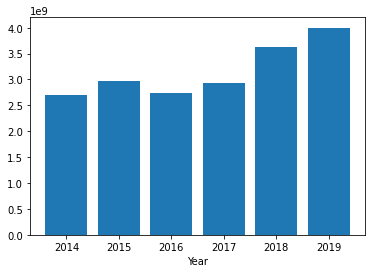

In [103]:
#Total capital expenses (could help the government visualize the change in time)
import matplotlib.pyplot as plt
df['Total Capital Expenses'].value_counts()
federaldf = df['Total Capital Expenses']
plt.bar(df['Year'],df['Total Capital Expenses'])
plt.xlabel('Year')
plt.show()
import pymannkendall as mk
capitalexpdf = df.groupby(df['Year'])['Total Capital Expenses'].sum()
capitalexpdf
trend = mk.original_test(capitalexpdf)

In [104]:
print(trend)

Mann_Kendall_Test(trend='increasing', h=True, p=0.008534920414227098, z=2.630142022557628, Tau=1.0, s=15.0, var_s=28.333333333333332, slope=984864093.5, intercept=17329354225.75)


In [31]:
print(df['Year'])

0        2018
1        2019
2        2019
3        2019
4        2018
         ... 
16478    2019
16479    2019
16480    2019
16481    2019
16482    2019
Name: Year, Length: 16483, dtype: int64


In [36]:
federaldf.value_counts()

0.0         6484
45002.0       18
31338.0       12
51652.0       10
22206.0        9
            ... 
34517.0        1
92817.0        1
193827.0       1
48457.0        1
77878.0        1
Name: Total Capital Expenses, Length: 8155, dtype: int64

In [41]:
df.groupby(df['Year'])['Total Capital Expenses'].sum()


Year
2014    1.767648e+10
2015    1.947541e+10
2016    1.964620e+10
2017    1.993682e+10
2018    2.154597e+10
2019    2.441191e+10
Name: Total Capital Expenses, dtype: float64

Operationalize- Is there a demand for public transportation? (rewrite to be what is the demand for public transportation? How much distance has been traveled due to passengers and how much money was earned by fares (an indirect measure of how many people are buying tickets, can also conduct trend analysis-i.e. is there a decline in use for public transportation?)

(use Urban Transit Service Provided and Consumed description from report)

-Passenger Miles Traveled (PMT) is the total number of miles traveled by all passengers
on a service.

-Total of Fares over time

-Service Effectiveness

One way to look at service effectiveness is to calculate passengers per hour—this reflects
how many passengers per vehicle are riding during a single hour of revenue service.
Passengers per hour is calculated by dividing UPT by Vehicle Revenue Hours (VRH).

Are public programs worth their cost? (rewrite as what does the NTA cost? What does it cost in terms of taxes and federal funds?)

-Calculate earned money (from funds and revenue) and subtract spent amount (simplistic but possibly effective)

What are some of the flaws of the program? (Scrap the question, replace with How prevalent is the NTA, where is used? Where is used most often?)

-Can use geomaps as heatmaps to portray its various locations and even population density

Make sure to refer back to 2019 report as source material

<AxesSubplot:xlabel='Year'>

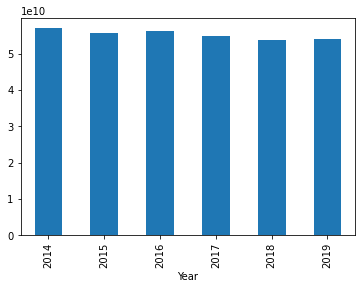

In [44]:
#Passenger Miles Traveled (PMT) is the total number of miles traveled by all passengers on a service.
df.groupby(df['Year'])['Total Passenger Miles'].sum().plot(kind='bar')


<AxesSubplot:xlabel='Year'>

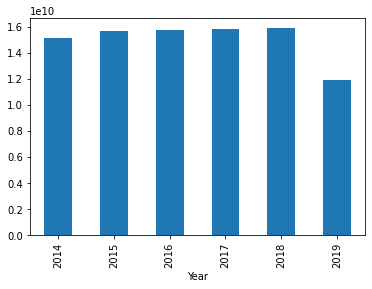

In [55]:
df.groupby(df['Year'])['Total of Fares'].sum().plot(kind='bar')

#Shows a drop from 2018 to 2019, is this significant? And is this considered a trend?

In [67]:
# trend analysis
faredf = pd.DataFrame(df.groupby(df['Year'])['Total of Fares'].sum())
print(faredf)
trend = mk.original_test(faredf['Total of Fares'])
print(trend)

      Total of Fares
Year                
2014    1.516400e+10
2015    1.565220e+10
2016    1.579010e+10
2017    1.583913e+10
2018    1.589064e+10
2019    1.194470e+10
Mann_Kendall_Test(trend='no trend', h=False, p=0.4523703606773608, z=0.7514691493021795, Tau=0.3333333333333333, s=5.0, var_s=28.333333333333332, slope=51503872.0, intercept=15592386697.0)


In [74]:
#How big of a difference between 2018 to 2019?
f = faredf['Total of Fares'].tolist()
percent = (abs(f[5]-f[4]))/f[4]
percent

0.24831824128331528

In [93]:
#easier way
percentchange = pd.DataFrame(faredf['Total of Fares'].pct_change())
p = percentchange['Total of Fares'].tolist()

In [100]:
# Method for calculating significant percent change provided by census data
#https://www2.census.gov/programs-surveys/acs/tech_docs/accuracy/percchg.pdf
from scipy.stats import sem
import math

stderrordf = pd.DataFrame(df.groupby(df['Year'])['Total of Fares'].sem())
stderrordf
s = stderrordf['Total of Fares'].tolist()
#Final equation for standard error of percentage: absolute value(2019value/2018value)*(Squareroot(se2019^2/2019value^2+se2018^2/2018value^2)*100
multipliers = 100*abs(f[5]/f[4])
root = math.sqrt(s[5]**2/f[5]**2 + s[4]**2/f[4]**2)
psterror = multipliers*root
lowerb = p[5]*100 - 1.65*psterror
upperb = p[5]*100 + 1.65*psterror
print(lowerb, upperb)
#Note from method: If both lb and ub have the same sign (that is both are positive or both are negative),then the percent change is statistically significant.
if((lowerb<0 and upperb<0)):
    print("The difference is statistically significant")

-25.04325955780404 -24.620388698859013
The difference is statistically significant


In [118]:
#Are public programs worth their cost? (rewrite as what does public transit cost? What does it cost in terms of taxes and federal funds?)

#-Calculate earned money (from funds and revenue) and subtract spent amount (simplistic but possibly effective)


#Income columns: Total of Fares, Park and Ride Revenue (Earned Only), Other Transportation Revenue (Earned Only), Total Auxiliary Revenue (Earned Only, N-P),
#Non-Transportation Revenue (Earned Only),PT Agmt with NTD Reporter Revenue, PT Agmt with Non-NTD Reporter Revenue, Donations Amount (RR),
#Contract Revenue Amount (RR), Other Directly Generated Funds, Revenue from General Fund, Income Taxes (Earned Only),
#Sales Taxes (Earned Only),Property Taxes (Earned Only),Gasoline Taxes (Earned Only), Other Taxes (Earned Only),Bridge, Tunnel, and Highway Tolls (Earned Only)
#High Occupancy Tolls (Earned Only), Other Dedicated Funds (Earned Only)

#Spent amount: Total Vehicle Operations Cost, Total Vehicle Operations Cost, Total Facility Maintenance Cost, Total General Administration Cost, 
#Total Operating Expenses, Total ADA Cost, Total Capital Expenses, Total Park & Ride, Other Trans., Auxiliary, & Non-Trans. Expenditures (K-S),



#calculating earnings:
earnings = 0
cost = 0
for name in df.columns:
    if "Earned Only" in name:
        earnings = earnings + df[name].sum()
    elif "Cost" in name:
        cost = cost + df[name].sum()
earnings = earnings - df['Total Auxiliary Revenue (Earned Only, N-P)'].sum()
print(earnings)
cost = cost + df['Total Capital Expenses'].sum() + df['Total Park & Ride, Other Trans., Auxiliary, & Non-Trans. Expenditures (K-S)'].sum()
print(cost)
profit = earnings - cost


#Can maybe do it over a couple years?

140218470445.0
413454656785.0


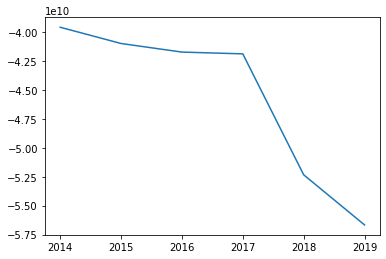

Mann_Kendall_Test(trend='decreasing', h=True, p=0.008534920414227098, z=-2.630142022557628, Tau=-1.0, s=-15.0, var_s=28.333333333333332, slope=-3414103731.6, intercept=-33283139457.0)


In [133]:

def profit(data):
    earnings = 0
    cost = 0
    for name in data.columns:
        if "Earned Only" in name:
            earnings = earnings + data[name].sum()
        elif "Cost" in name:
            cost = cost + data[name].sum()
    earnings = earnings - data['Total Auxiliary Revenue (Earned Only, N-P)'].sum()
    cost = cost + data['Total Capital Expenses'].sum() + data['Total Park & Ride, Other Trans., Auxiliary, & Non-Trans. Expenditures (K-S)'].sum()
    profit = earnings - cost
    return profit

df2014 = df.loc[(df['Year'] == 2014)]
df2015 = df.loc[(df['Year'] == 2015)]
df2016 = df.loc[(df['Year'] == 2016)]
df2017 = df.loc[(df['Year'] == 2017)]
df2018 = df.loc[(df['Year'] == 2018)]
df2019 = df.loc[(df['Year'] == 2019)]
pr = [profit(df2014),profit(df2015),profit(df2016),profit(df2017),profit(df2018),profit(df2019)]
plt.plot([2014,2015,2016,2017,2018,2019],pr)
plt.show()
# trend anaysis
trend = mk.original_test(pr)
print(trend)

In [ ]:
#What are some of the flaws of the program? (Scrap the question, replace with How prevalent is the NTA, where is used?)
#-Can use geomaps as heatmaps to portray its various locations and even population density

#• Small UZAs: population of 50,000 to 200,000.

#• Medium UZAs: population of 200,000 to 1 million.

#• Large UZAs: population over 1 million.

#Maybe use geomaps to portray which places have the lowest and highest profits










